In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

[215.5989389665271, 208.26870105840143, 200.99361133806113, 205.21578376592416, 207.55235205850605, 193.8801068646984, 193.93464677432456, 195.6513762418203, 192.595876260271, 188.50935316985786, 192.8617673651838, 189.42733966457573, 181.72398346897205]


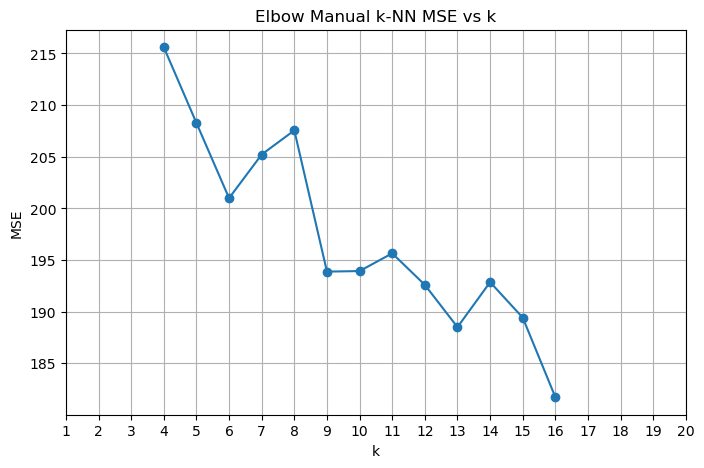

In [29]:

np.random.seed(42)
data = np.random.uniform(0.1, 100, size=50)
data_sorted = np.sort(data)
data_array = np.array(data_sorted)
X = data_array
Y = np.sin(X) * 20 + np.random.randn(50) * 0.8 

mse_per_k = []
K_max = 20

for k in range(4, 17):
    mse_calc = 0
    my_range = 20
    for p in range(0, my_range):
        current_point = [X[p], Y[p]]
        dist = np.round(np.abs(X[p] - X), 2)  # distnace of my-point to ALL other points
    
        dist[p] = np.inf
        
   
        argsort_index = np.argsort(dist)
    
        Y_pred = np.average(Y[argsort_index[:k]])
        mse_calc += (Y[p] - Y_pred)**2

    mse_result = mse_calc / my_range
    mse_per_k.append(mse_result)
    
print(mse_per_k)


plt.figure(figsize=(8, 5))
plt.plot(range(4, 17), mse_per_k, marker='o')
plt.title("Elbow Manual k-NN MSE vs k")
plt.xlabel("k")
plt.ylabel("MSE")
plt.grid(True)
plt.xticks(range(1, K_max + 1))
plt.show()


In [44]:
from sklearn.neighbors import KNeighborsRegressor

np.random.seed(42)
data = np.random.uniform(0.1, 100, size=50)
data_sorted = np.sort(data)
data_array = np.array(data_sorted)
X = data_array
Y = np.sin(X) * 20 + np.random.randn(50) * 0.8 

X_train = X.reshape(-1, 1)
k = 9
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, Y)

def knn_predict(x) -> float:
    return knn.predict(np.array([x]).reshape(-1, 1))
    
predict_x = [105.0, 100.0]
y_predict = knn_predict(predict_x)

print(f'predict {predict_x} = {y_predict}')


predict [105.0, 100.0] = [4.37017404 4.37017404]


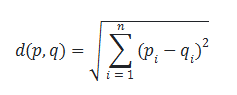

### Table 1: X1, X2, Y

| X1  | X2  | Y    |
|-----|-----|------|
| 1.0 | 2.0 | 3.8  |
| 1.5 | 1.0 | 3.2  |
| 2.0 | 2.5 | 5.0  |
| 3.0 | 3.5 | 7.1  |
| 4.0 | 2.0 | 6.0  |
| 5.0 | 4.0 | 9.3  |
| 6.0 | 3.0 | 9.0  |
| 7.0 | 4.5 | 11.2 |

---

### Table 2: X1, X2, X3, Y

| X1  | X2  | X3  | Y    |
|-----|-----|-----|------|
| 1.0 | 2.0 | 0.5 | 4.1  |
| 1.5 | 1.8 | 0.7 | 4.5  |
| 2.0 | 2.5 | 1.0 | 6.2  |
| 3.0 | 3.5 | 1.2 | 8.4  |
| 4.0 | 2.0 | 1.5 | 7.9  |
| 5.0 | 3.0 | 2.0 | 10.3 |
| 6.0 | 4.0 | 2.5 | 12.1 |
| 7.0 | 3.5 | 3.0 | 13.0 |


In [100]:
# ==== Table 2 data ====
X_data = np.array([
    [1.0, 2.0, 0.5],
    [1.5, 1.8, 0.7],
    [2.0, 2.5, 1.0],
    [3.0, 3.5, 1.2],
    [4.0, 2.0, 1.5],
    [5.0, 3.0, 2.0],
    [6.0, 4.0, 2.5],
    [7.0, 3.5, 3.0],
])

Y_data = np.array([4.1, 4.5, 6.2, 8.4, 7.9, 10.3, 12.1, 13.0])
point = np.array([7.4, -2.0, 0.0])
print(point)
print()

# show how to make it shorter
dist = (point - X_data)
print(dist)
dist = dist**2
print(dist)
sum_dist = np.sum(dist, 1)
print(sum_dist)
sqrt_dist = np.sqrt(sum_dist )
print(sqrt_dist)
index_smallest = np.argsort(sqrt_dist)[0]
print(index_smallest)
print(Y_data[index_smallest])

# short - but is it understood?
Y_data[np.argsort((np.sqrt((np.sum((point - X_data)**2, 1)))))[0]]

# dedicated formula
np.linalg.norm(X_data - point, axis=1)


################################# knn model
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_data, Y_data)
   
predict_x = [7.4, -2.0, 0.0]
y_predict = knn.predict(point.reshape(1, -1))

print(f'predict {predict_x} = {y_predict}')

[ 7.4 -2.   0. ]

[[ 6.4 -4.  -0.5]
 [ 5.9 -3.8 -0.7]
 [ 5.4 -4.5 -1. ]
 [ 4.4 -5.5 -1.2]
 [ 3.4 -4.  -1.5]
 [ 2.4 -5.  -2. ]
 [ 1.4 -6.  -2.5]
 [ 0.4 -5.5 -3. ]]
[[40.96 16.    0.25]
 [34.81 14.44  0.49]
 [29.16 20.25  1.  ]
 [19.36 30.25  1.44]
 [11.56 16.    2.25]
 [ 5.76 25.    4.  ]
 [ 1.96 36.    6.25]
 [ 0.16 30.25  9.  ]]
[57.21 49.74 50.41 51.05 29.81 34.76 44.21 39.41]
[7.56372924 7.05265907 7.1        7.14492827 5.45985348 5.89576119
 6.64906008 6.27773845]
4
7.9
predict [7.4, -2.0, 0.0] = [10.4]
